## BANGLORE HOUSE PRICE PREDICTION- DATA SCIENCE REGRESSION PROJECT

## About the data
### This data contains:

### Problem Statement:
To predict the price based on the other factors

### Import required libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Review the data

In [21]:
data = pd.read_csv(r'Bengaluru_House_Data (1).csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [22]:
#check the shape of data
data.shape

(13320, 9)

In [23]:
# check the columns
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [24]:
#check the unique values in area_type
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [25]:
#check the value counts of area_type 
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

#### Drop features that are not required to build our mode

In [26]:
data = data.drop(['area_type','availability','balcony','society'],axis='columns')
data.shape

(13320, 5)

In [27]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Data cleaning- handling NA value

In [28]:
# check the null values
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [29]:
#drop null values
data = data.dropna()
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [30]:
data.shape

(13246, 5)

### Feature engineering

In [31]:
# check the unique values in size
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

#### Add new feature(integer) for bhk

In [32]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [33]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


#### Explore total_sqft feature

In [34]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [35]:
data[~data['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range.

In [38]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
          return (float(tokens[0])+float(tokens[1]))/2    #we covert individual number into float and we take average
    try:
        return float(x)  #if the number is normal number we convert it into a float
    except:
        return None         # otherwise none
            

In [39]:
data.total_sqft = data.total_sqft.apply(convert_sqft_to_num)
data = data[data.total_sqft.notnull()]
data.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


#### For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850

In [40]:
data.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

### Feature engineering
#### Add new feature called price_per_sqft


In [41]:
data['price_per_sqft'] = data['price']*100000/data['total_sqft']

In [42]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [43]:
data_stats = data['price_per_sqft'].describe()
data_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [44]:
data.to_csv("bhp.csv",index=False)

#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [45]:
len(data.location.unique())

1298

In [46]:
data.location = data.location.apply(lambda x:x.strip())          
#strip function use to remove spaces in the begining and in the end

location_stats = data.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [47]:
len(location_stats[location_stats<=10])

1047

In [48]:
location_stats_less_than_10 = (location_stats[location_stats<=10])
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [49]:
len(data.location.unique())

1287

In [50]:
# If location is less than 10 then we apply other there
data.location=data.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data.location.unique())

241

### outlier removal using business logic
#### when you have a conversation with your business manager , he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft.)If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [51]:
data[data.total_sqft/data.bhk<300].head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [52]:
data.shape


(13200, 7)

#### Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [53]:
#remove some outlieer which is unusal
data = data[~(data.total_sqft/data.bhk<300)]
data.shape

(12456, 7)

### Outlier Removal Using Standard Deviation and Mean

In [54]:
data.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [55]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(data)
df7.shape

(10242, 7)

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

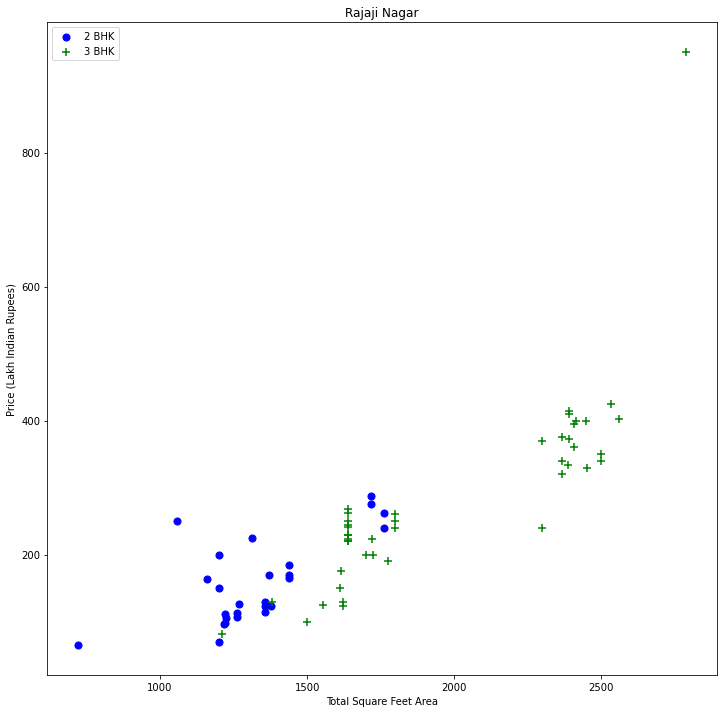

In [56]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(12,12))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data,"Rajaji Nagar")

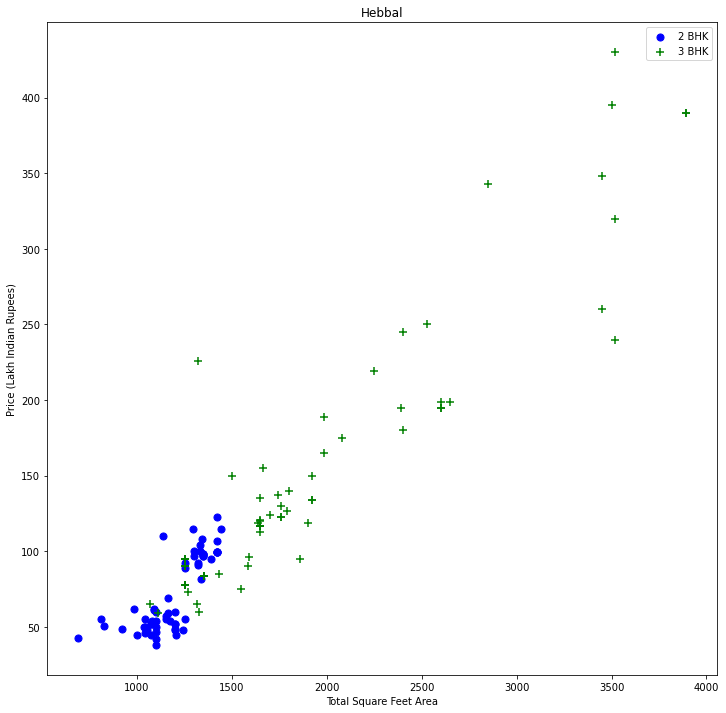

In [57]:
plot_scatter_chart(data,"Hebbal")

#### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [58]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data = remove_bhk_outliers(data)
data.shape

(8638, 7)

#### Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

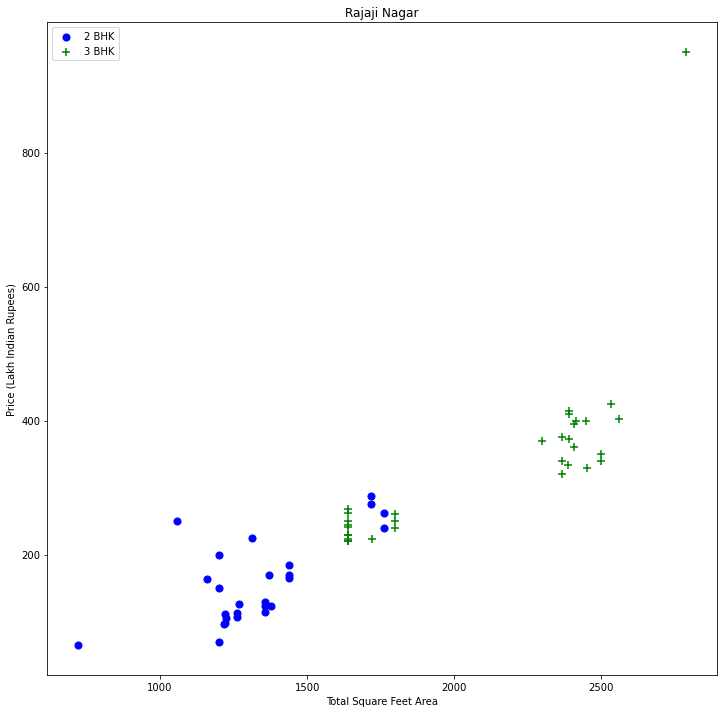

In [59]:
plot_scatter_chart(data,"Rajaji Nagar")

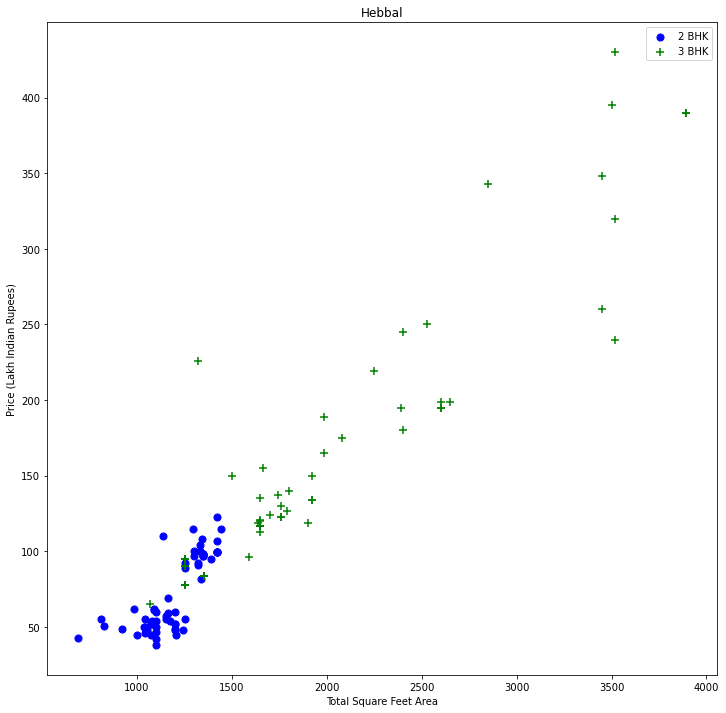

In [60]:
plot_scatter_chart(data,"Hebbal")

Text(0, 0.5, 'Count')

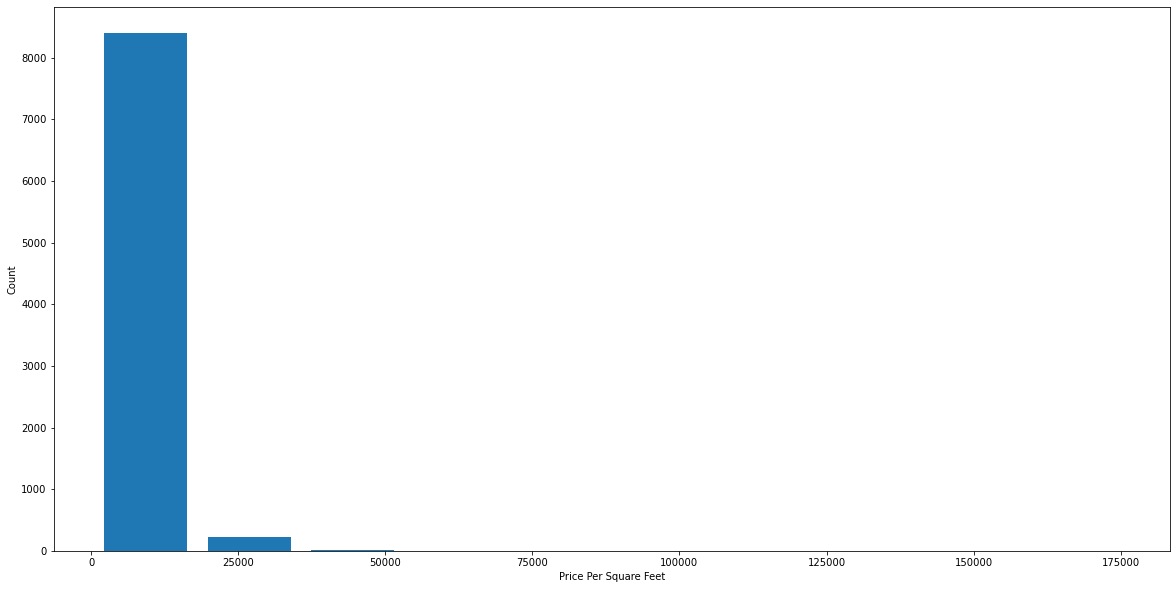

In [61]:
plt.figure(figsize=(20,10))
plt.hist(data.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Outlier Removal Using Bathrooms Feature

In [62]:
data.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 14., 16., 10., 12.,
       13.])

Text(0, 0.5, 'Count')

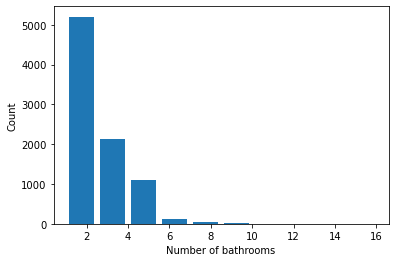

In [63]:
plt.hist(data.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [64]:
data[data.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9935,other,13 BHK,5425.0,13.0,275.0,13,5069.124424
13067,other,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350


#### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [65]:
data[data.bath>data.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1078,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
6838,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
9974,other,3 Bedroom,2400.0,6.0,775.0,3,32291.666667
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
12443,other,4 Bedroom,4350.0,8.0,2600.0,4,59770.114943
13067,other,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350


####  if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [66]:
data = data[data.bath<data.bhk+2]
data.shape

(8508, 7)

In [67]:
data.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101


In [68]:
data = data.drop(['size','price_per_sqft'],axis='columns')
data.head(3)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3


### One Hot Encoding For Location

In [69]:
dummies = pd.get_dummies(data.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data = pd.concat([data,dummies.drop('other',axis='columns')],axis='columns')
data.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Old Airport Road,2732.0,4.0,204.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data = data.drop('location',axis='columns')
data.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Build a model

In [72]:
data.shape

(8508, 244)

In [73]:

x = data.drop(['price'],axis = 1)
y = data.price

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [75]:
print('the size of the training data',x_train.shape, 'and', y_train.shape)
print('the size of the testing data',x_test.shape ,'and', y_test.shape)

the size of the training data (6806, 243) and (6806,)
the size of the testing data (1702, 243) and (1702,)


In [76]:
from sklearn.linear_model import LinearRegression


In [77]:
model = LinearRegression()

In [78]:
model.fit(x_train,y_train)

LinearRegression()

In [79]:
model.score(x_test,y_test)

0.652674714334593

### Use K Fold cross validation to measure accuracy of our LinearRegression model


In [80]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.62205553, 0.70641756, 0.70942845, 0.6528111 , 0.65420337])

#### We can see that in 5 iterations we get a score above 60% all the time. Now we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

### Find best model using GridsearchCV

In [82]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.668983,{'normalize': False}
1,lasso,0.604297,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.501158,"{'criterion': 'mse', 'splitter': 'best'}"


### Here I find that Linear regression Algorithm is much better than other.
#### Now lets do predictions

In [83]:
predict = model.predict(x_test)
predict

array([358.1820231 ,  94.22726224,  77.57603675, ...,  59.08913076,
       105.48618419, 240.43201469])

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test, predict)

0.652674714334593